# Spatial Reference Systems

### Short Introduction

A Spatial Reference System (SRS) is a mathematical construct that is essential to the discipline of Geography. It has two important roles:
 1. identify unequivocally and with precision the location of a spatial object;
 2. accuratelly portray spatial objects in maps.

In its most basic form a SRS is composed by two elements:
 1. *Datum* - a sphere or ellipsoid that approximates the shape of the Earth, positioned relative to the later. 
 2. *Cartographic Projection* - a set of mathematical functions that translate locations in the surface of the *datum* into the Cartesian plane.
 
The WGS84 is standard *datum* issued by the World Geodetic Survey that is in wide use today. Most GPS or GNSS recievers today report geographic coordinates (e.g. longitude and latitude) in reference to this *datum*. For global cartography the WGS84 is an obvious choice, but for local mapping a bespoke *datum* can be more suitable. Most national surveys have defined *data* that suit appropriatly their country or region.

![Geodesic Datum](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b2/Gloabl_and_Regional_Ellipsoids.svg/1280px-Gloabl_and_Regional_Ellipsoids.svg.png)
*Sketch of geodesic data positioned relative to the Earth's surface. Source: [Wikipaedia](https://en.wikipedia.org/wiki/Geodetic_datum).* 

The Marinus of Tyre and Mercator projections are the most popular today, however, none of them is suited for either local or global cartography (appart from navigation applications in the case of Mercator). It is always useful to spend some time identifying the most appropriate projection for the work at hand. Cartagraphic projections introduce errors as they flaten the curved surface of the Earth onto a plane. A balance must be struck between the accuracy of areas, shapes and angles. For global mapping, projections like [Mollweide's Homolographic](https://en.wikipedia.org/wiki/Mollweide_projection), [Eckert IV](https://en.wikipedia.org/wiki/Eckert_IV_projection) or [Goode's Homolosine](https://en.wikipedia.org/wiki/Goode_homolosine_projection) present interesting compromises. For local mapping, the [Stereographic](https://en.wikipedia.org/wiki/Stereographic_projection#Applications_to_other_disciplines), [Lambert's Azimutal Equal-Area](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) and [Gauss-Krüger](https://en.wikipedia.org/wiki/Transverse_Mercator_projection#Ellipsoidal_transverse_Mercator) are popular choices, but many more exist.

![Map Projections](https://upload.wikimedia.org/wikipedia/commons/0/02/Kaardiprojektsiooni_klassid.gif)
*Visual examples of the transformations applied to the *datum* by simple map projections. Source: [Wikipaedia](https://en.wikipedia.org/wiki/Map_projection).*

Always keep in mind one thing: no cartographic projection is not able to preserve distances correctly. Therefore avoid computing distances in the Cartesian plane, as they will be wrong. In small areas the error might be negligible, but at global or continental scales, even for large countries like Russia, distances computed on the Cartesian plane are significantly off. 

### Python libraries

The GDAL/OGR Python API library includes a dedicated module to handle Spatial Reference Systems (SRS): [osgeo.osr](https://gdal.org/python/osgeo.osr-pysrc.html). This module makes it rather simple to parametrise SRSs and transform coordinates between.

The [PROJ](https://proj.org) library is a cornerstone of FOSS4G that implements a large number of cartographic projections. GDAL supports most of the projections implemented by PROJ, therefore they are also available to the `osgeo.osr` module. The list of [cartographic projections implemented by PROJ](https://proj.org/operations/projections/index.html) is a good place to start exploring the different characteristic of each projection. 

### Create a new Spatial Reference object

In the `osr` module the concept of SRS is encapsulated in the `SpatialReference` class. A SRS can be parametrised with an object of this class in different ways. The simplest is possibly using a [PROJ string](https://proj.org/usage/quickstart.html), a synthetic and expressive set of parameters in a character string. This is made through the `ImportFromProj4`method:

In [3]:
from osgeo import osr
hammer = osr.SpatialReference()
hammer.ImportFromProj4("+proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units=m +no_defs +wktext")

0

A more formal way to initialise a `SpatialReference` object is using an [OGC Well Know Text](https://www.opengeospatial.org/standards/wkt-crs) definition. This is far more verbose, but also more accurate. The following example iniatilises a new object with the geographic system based on the WGS84:

In [4]:
geographic = osr.SpatialReference()
geographic.ImportFromWkt(
	'''GEOGCS[
		"WGS 84",
		DATUM[
			"WGS_1984",
			SPHEROID[
				"WGS 84",6378137,298.257223563,
				AUTHORITY["EPSG","7030"]
			],
			AUTHORITY["EPSG","6326"]
		],
		PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],
		UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],
		AUTHORITY["EPSG","4326"]
	]''')

0

Note that no projection was defined, this system is supposed to refer strictly to longitude and latitude. However, most GIS programmes interpret this SRS as including the Marinus of Tyre projection (beware of distance or area computations).

The [European Petroleum Survey Group (EPSG)](http://wiki.gis.com/wiki/index.php/European_Petroleum_Survey_Group) was a scientific body supporting the Petroluem & Gas industry in Europe. It developed an [extensive database](http://www.epsg.org/) of parametres and complete SRS definitions, that helped the industry standardise its cartographic processes. The EPSG assigned a unique numerical identifier to each entry in its database, which became rather handy to quickly refer to a specific, well defined, SRS. Most FOSS4G support the EPSG identifiers as quick reference (some even enforce it). PROJ and GDAL are no exceptions, and therefore `SpatialReference` objects can too be initialised with an EPSG identifier:

In [5]:
laea_europe = osr.SpatialReference()
laea_europe.ImportFromEPSG(3035)

0

There are other methods to initialise a `SpatialReference` object, but these are the most common. There are also conversive methods, that export the parameters of into different 

In [6]:
print(hammer.ExportToPrettyWkt())

PROJCS["unnamed",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["custom_proj4"],
    UNIT["Meter",1],
    EXTENSION["PROJ4","+proj=hammer +lat_0=0 +lon_0=0 +datum=WGS84 +units=m +no_defs +wktext"]]


In [7]:
laea_europe.ExportToProj4()

'+proj=laea +lat_0=52 +lon_0=10 +x_0=4321000 +y_0=3210000 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs '

### Create and use SRS transformations

With the SRSs parametrised, it becomes possible to convert coordinates between different systems. In the `osr` module this is made with the `CoordinateTransformation` class. It is initialised with an input SRS and an output SRS. The following defines a transformation between geographic coordinates and the European system with Lambert's Azimuthal Equal-Area projection: 

In [8]:
transformEurope = osr.CoordinateTransformation(geographic, laea_europe)

The University of Bucharest is approximately sited at 44.44º N and 26.1º W, relative to the WGS84. Let us check its coordinates in the European system:

In [9]:
transformEurope.TransformPoint(44.44, 26.1)

(7733745.43369763, 1113687.0610888475, 0.0)

Question: the central point of the European system is in Potsdam, which lies at a latitude of 52º N. Why are none of the coordinates output above negative?

### Working with geometries

In most cases work evolves around existing spatial objects. Conviniently, the `Geometry` class in the `osgeo.ogr` module provides a method named `Transform` that takes as argument a `CoordinateTransformation` object. The segment below exemplifies its use:

In [11]:
from osgeo import ogr
geo_point = ogr.Geometry(ogr.wkbPoint)
geo_point.AddPoint(44.44, 26.1)
geo_point.Transform(transformEurope)
print("The point transformed: ", str(geo_point.GetX()), " ", str(geo_point.GetY()))


The point transformed:  7733745.43369763   1113687.0610888475


Note how the transformation modified the `Geometry` object itself.

### Practical example

In many cases it is necessary to work with spatial data created by someone else. It is then important to clearly identify the SRS of such data to make sure it matches the SRS used for analysis.

The example below opens a dataset with the borders of Romania and inspects its SRS. This type of data is detailed in the [Vector Data](04-vector-data.ipynb) section.

In [12]:
from shapely.geometry import Polygon

driver = ogr.GetDriverByName("GPKG")
dataSource = driver.Open("../data/romania.gpkg", 0)
layer = dataSource.GetLayer()
feature = layer.GetNextFeature()
ref = feature.GetGeometryRef()
ref.GetSpatialReference().ExportToProj4()

'+proj=longlat +datum=WGS84 +no_defs '

This dataset includes only geographic coordinates, referring to the WGS84 datum. The `longlat` parameter means that the [Marinus of Tyre projection](https://en.wikipedia.org/wiki/Marinus_of_Tyre) is applied when plotting the data or using it for any kind of analysis.

What does this mean in practice? The best way is to plot the data and see how it looks. A simple way of doing so is with the `matplotlib` library, essentially passing a collection of coordinate pairs to a X-Y plot.

Text(0.5,1,'Romania - Marynus of Tyre projection')

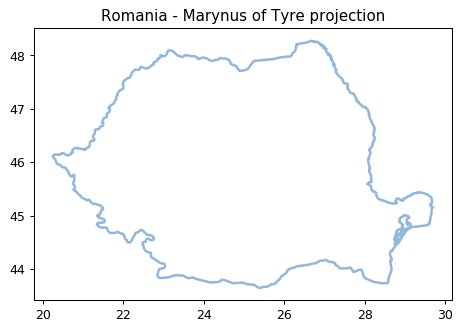

In [16]:
from matplotlib import pyplot as plt
import shapely.wkb

borders = shapely.wkb.loads(feature.GetGeometryRef().ExportToWkb())
x,y = borders.geoms[0].exterior.xy
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=2, solid_capstyle='round', zorder=2)
ax.set_title('Romania - Marynus of Tyre projection')

What if a different SRS is required for analysis? The `transformEurope` object is used again for convinient. With the `TransformPoints` method it is possible to transform a list of coordinate pairs. This method returns a list a tuples, that is converted to a set of lists with the `zip` method.

In [14]:
coords_lst = list(borders.geoms[0].exterior.coords)
borders3035 = transformEurope.TransformPoints(coords_lst)
x,y,z = list(zip(*borders3035))

With the transformed coordinates in separate lists, `matplotlib` can be used again to visually inspect the outcome.

Text(0.5,1,'Romania - Lambert Azimuthal Equal-Area (datum Potsdam)')

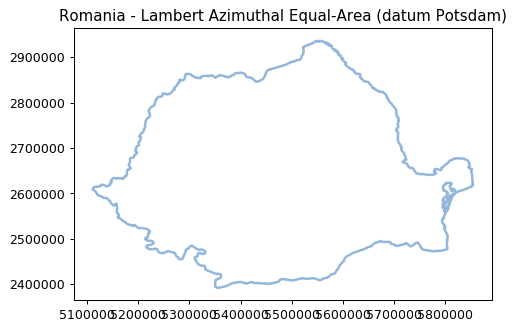

In [15]:
fig = plt.figure(1, dpi=90)
ax = fig.add_subplot(111)
ax.plot(x, y, color='#6699cc', alpha=0.7,
    linewidth=2, solid_capstyle='round', zorder=2)
ax.set_title('Romania - Lambert Azimuthal Equal-Area (datum Potsdam)')

Why aren't the two borders shapes similar? Which of the SRSs would you chose to conduct a spatial analysis in Romania?

## Conclusions

- Always check the coordinate system of each dataset before using it. Be it in complex analysis or simply to plot.
- Make sure all datasets needed are in the same SRS before combining them.
- Take same time to identify the best SRS for the study at hand:
  - Local versus global datum;
  - Projection distortion properties.